In [1]:
import numpy as np                      # I use this for maths and sometimes arrays.
                                        # "np" is just an abbreviation since we call this package so often!
import pylab                            # I use this for arrays and plotting
import matplotlib                       # Another plotting package
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # If there is a task you use a lot, importing it like this 
                                         # keeps you from having to constantly type "matplotlib.gridspec"
                                        # every time you call that task!
        
import scipy
import astropy.io.fits as fits          # I use this to import FITS images. 
                                        # Astropy should be included in your conda installation
from astropy.wcs import WCS             # This one helps us add coordinates to images
import pyspeckit as psk                 # I use this to do spectral line fitting
                                        #Anna: Had to install using an anaconda terminal window, its located at Users\Anna\AppData\Local\pip

from astropy.nddata import Cutout2D     #To make image cut outs
from astropy.coordinates import SkyCoord
import matplotlib.cm as cm #for colorbar??

from reproject import reproject_interp      #Anna: pip install reproject
from reproject.mosaicking import find_optimal_celestial_wcs 

import sys                 # Suppress warnings we don't care about:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
                                            
    
# Super important: This embeds plots in the Jupyter window (instead of showing them as pop-ups)
%matplotlib inline                             

#Set plot fonts
matplotlib.rc('text', usetex=True) #Change to True later if Latex is installed
matplotlib.rc('font', family='sans-serif')


The current image shape is:  (1221, 1221)


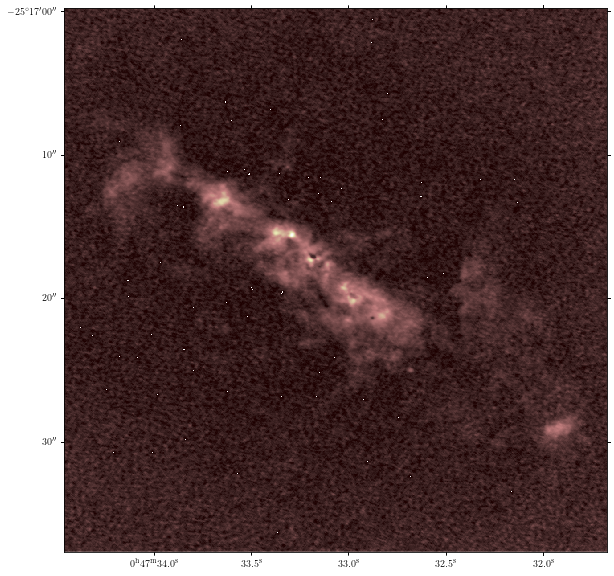

In [2]:
#From Betsy: "I added a few first integrated maps in the dropbox folder for NGC 253! subfolder Moment_maps"
# CS_mask.integrated.fits
# HCO+_mask.integrated.fits
# HNCO_mask.integrated.fits
# HCN_mask.integrated.fits

path = 'HCN_mask.integrated.fits'
image = fits.getdata(path)  
header = fits.getheader(path)

#print(header) #You can print the entire header just to see its contents

w = WCS(header) 
#print(w)
print("The current image shape is: ", np.shape(image))

fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=w)
im1 = pylab.imshow(image,cmap='pink') #colors from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

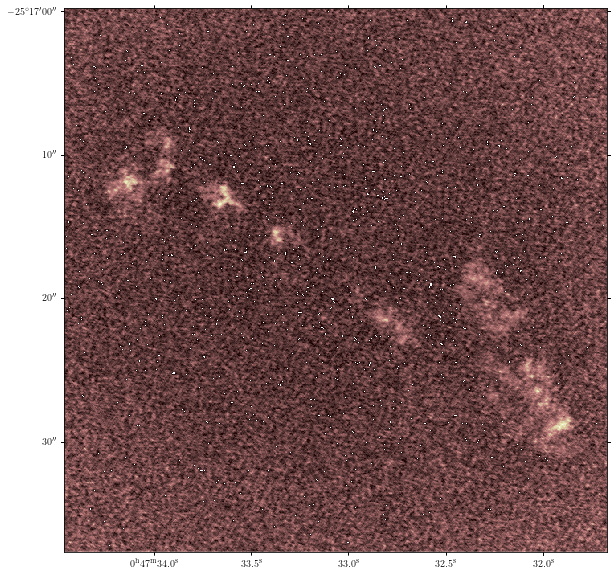

In [3]:
path2 = 'HNCO_mask.integrated.fits'
image2 = fits.getdata(path2)  
header2 = fits.getheader(path2)

w2 = WCS(header2) 

fig2 = pylab.figure(1,figsize=(10,10))
ax2 = pylab.subplot(projection=w2)
im2 = pylab.imshow(image2,cmap='pink')

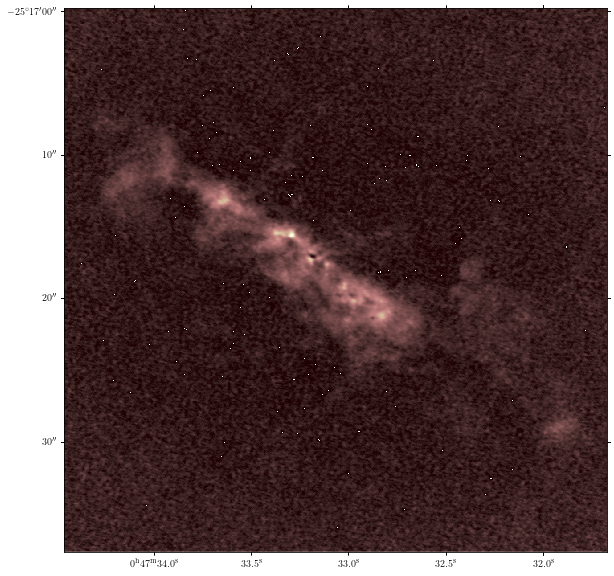

In [4]:
path3 = 'HCO+_mask.integrated.fits'
image3 = fits.getdata(path3)  
header3 = fits.getheader(path3)


w3 = WCS(header3) 

fig3 = pylab.figure(1,figsize=(10,10))
ax3 = pylab.subplot(projection=w3)
im3 = pylab.imshow(image3,cmap='pink')

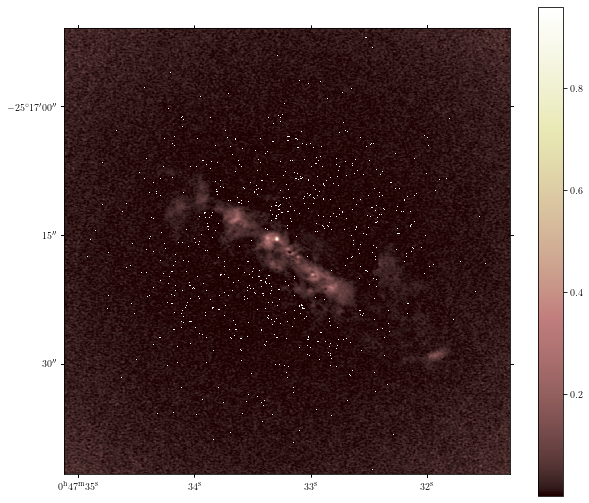

In [5]:
path4 = 'CS_mask.integrated.fits'
image4 = fits.getdata(path4)  
header4 = fits.getheader(path4)

w4 = WCS(header4) 

fig4 = pylab.figure(1,figsize=(10,10))
ax4 = pylab.subplot(projection=w4)
im4 = pylab.imshow(image4,cmap='pink')
fig4.colorbar(im4, ax=ax4, shrink=0.9)

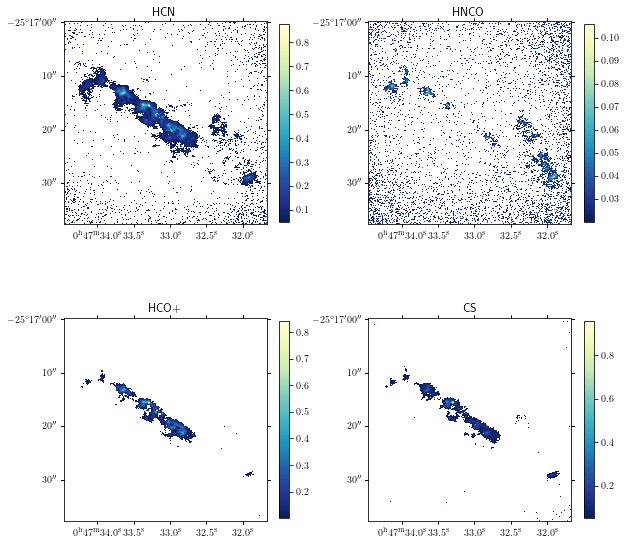

In [6]:
#its subplot time (https://matplotlib.org/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py)
fig = pylab.figure(4, figsize=(10,10))

#Getting rid of noise for HCN
bad_pix = np.where(image<0.05)
image[bad_pix] = np.nan

ax1 = pylab.subplot(2,2,1,projection=w) # Since we are looking at the same object, we can keep our WCS information
ax1.set_title('HCN')
im1 = pylab.imshow(image,cmap='YlGnBu_r')
fig.colorbar(im1, ax=ax1, shrink=0.8)

#Getting rid of noise for HNCO
bad_pix = np.where(image2<0.02)
image2[bad_pix] = np.nan

ax2 = pylab.subplot(2,2,2, projection=w2)
ax2.set_title('HNCO')
im2 = pylab.imshow(image2,cmap='YlGnBu_r')
fig.colorbar(im2, ax=ax2, shrink=0.8)


#Getting rid of noise for HCO+
bad_pix = np.where(image3<0.1)
image3[bad_pix] = np.nan

ax3 = pylab.subplot(2,2,3,projection=w3)
ax3.set_title('HCO+')
im3 = pylab.imshow(image3,cmap='YlGnBu_r')
fig.colorbar(im3, ax=ax3, shrink=0.8)

#Before I plot CS, need to reproject so its size matches the others, and so I can take a ratio later
#From https://reproject.readthedocs.io/en/stable/ , use "array, footprint = reproject_interp(hdu2, hdu1.header)"
#where the first argument in () is the one being reprojected, and the second with ".header" is what its being projected onto

image4_reproj, footprint = reproject_interp((image4, header4) , header3) #could use any of the others, image, image2, image3

#Getting rid of noise for CS
bad_pix = np.where(image4_reproj<0.05)
image4_reproj[bad_pix] = np.nan

ax4 = pylab.subplot(2,2,4, projection=w3) #header should match image 3 now
ax4.set_title('CS')
im4 = pylab.imshow(image4_reproj,cmap='YlGnBu_r')
fig.colorbar(im4, ax=ax4, shrink=0.8)


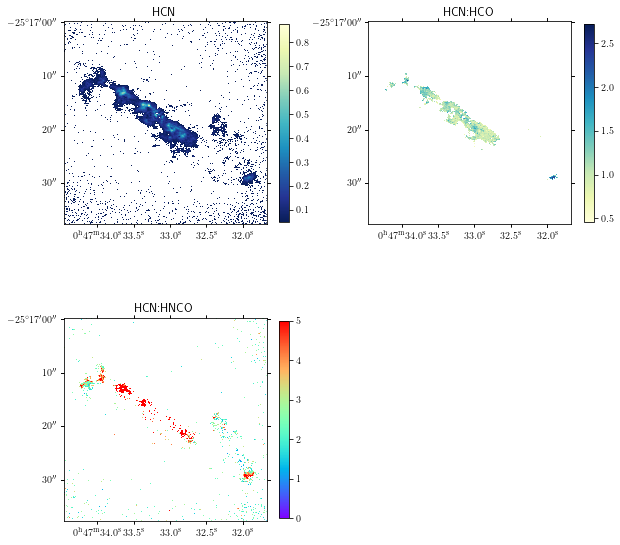

In [7]:
#print("The current image shape is: ", np.shape(image))
#print("The current image shape is: ", np.shape(image2))
#print("The current image shape is: ", np.shape(image3))
#print("The current image shape is: ", np.shape(image4)) #image 4 is a diff shape than the rest, cant make ratio map yet

#HCN Ratio map time!
fig_ratio = pylab.figure(4, figsize=(10,10))

#HCN = image
ax1 = pylab.subplot(2,2,1,projection=w) 
ax1.set_title('HCN')
im1 = pylab.imshow(image,cmap='YlGnBu_r')
fig_ratio.colorbar(im1, ax=ax1, shrink=0.8)

#HCN:HCO  HCO = image3
HCN_HCO = image / image3
ax5 = pylab.subplot(2,2,2,projection=w)
ax5.set_title('HCN:HCO')
im5 = pylab.imshow(HCN_HCO, cmap='YlGnBu') #Betsy suggested 0-5 range, but it defaults to more restrictive after bad_pix cuts
fig_ratio.colorbar(im5, ax=ax5, shrink=0.8)

#HNCO = image2
HCN_HCNO = image / image2
ax6 = pylab.subplot(2,2,3,projection=w)
ax6.set_title('HCN:HNCO')
im6 = pylab.imshow(HCN_HCNO, vmin=0, vmax=5, cmap='rainbow') # 0-40
fig_ratio.colorbar(im6, ax=ax6, shrink=0.8)

#CS=image4
#HCN_CS = image / image4
#ax7 = pylab.subplot(2,2,4,projection=w)
#im7 = pylab.imshow(HCN_CS,cmap='pink')
#fig_ratio.colorbar(im7, ax=ax7, shrink=0.8)



The shape of HCN is:  (1221, 1221)
The shape of HNCO is:  (1221, 1221)
The shape of HCO is:  (1221, 1221)
The shape of CS is:  (1221, 1221)


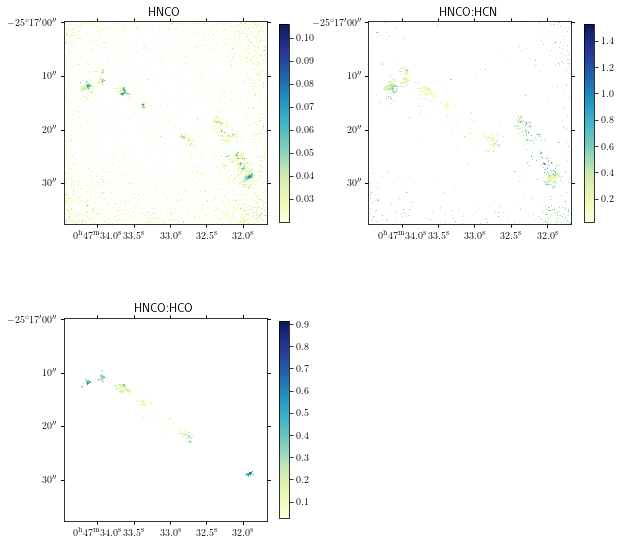

In [8]:
#HNCO Ratio map time!
fig_HNCO_ratio = pylab.figure(4, figsize=(10,10))

#HCN = image, HCO = image3, HNCO = image2, CS=image4
ax2 = pylab.subplot(2,2,1, projection=w)
ax2.set_title('HNCO')
im2 = pylab.imshow(image2,cmap='YlGnBu')
fig_HNCO_ratio.colorbar(im2, ax=ax2, shrink=0.8)

#HNCO:HCN  
HNCO_HCN = image2 / image
ax8 = pylab.subplot(2,2,2,projection=w)
ax8.set_title('HNCO:HCN')
im8 = pylab.imshow(HNCO_HCN,cmap='YlGnBu')
fig_HNCO_ratio.colorbar(im8, ax=ax8, shrink=0.8)

#HNCO:HCO
HNCO_HCO = image2 / image3
ax9 = pylab.subplot(2,2,3,projection=w)
ax9.set_title('HNCO:HCO')
im9 = pylab.imshow(HNCO_HCO,cmap='YlGnBu')
fig_HNCO_ratio.colorbar(im9, ax=ax9, shrink=0.8)

#HNCO:CS
#HNCO_CS = image2 / image4
#ax10 = pylab.subplot(2,2,4,projection=w)
#im10 = pylab.imshow(HNCO_CS,cmap='pink')
#fig_HNCO_ratio.colorbar(im10, ax=ax10, shrink=0.8)

#should've done this sooner, but doing it now so names are easier later:
HCN = image
HNCO = image2
HCO = image3
CS = image4_reproj

print("The shape of HCN is: ", np.shape(HCN))
print("The shape of HNCO is: ", np.shape(HNCO))
print("The shape of HCO is: ", np.shape(HCO))
print("The shape of CS is: ", np.shape(CS)) #okay so CS still isn't fixed ?

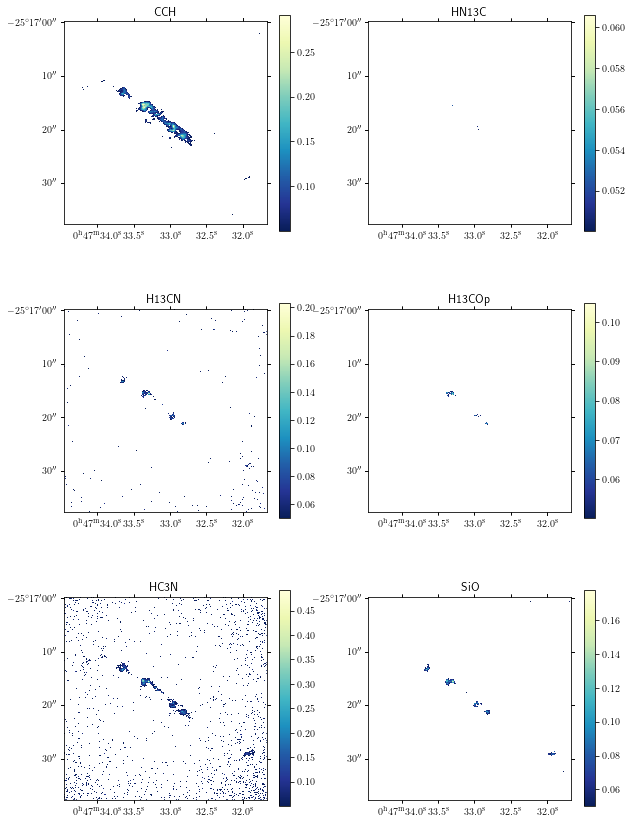

In [9]:
#Second round of moment maps from Betsy: SiO, H13CO+, H13CN, HN13C, CCH, and HC3N
#CCH_mask.integrated.fits
#HN13C_mask.integrated.fits
#H13CN_mask.integrated.fits
#H13COp_mask.integrated.fits
#HC3N_mask.integrated.fits
#SiO_mask.integrated.fits

#map_list=[CCH_mask.integrated.fits, HN13C_mask.integrated.fits, H13CN_mask.integrated.fits, 
#    H13COp_mask.integrated.fits, HC3N_mask.integrated.fits, SiO_mask.integrated.fits]

maplist=['CCH', 'HN13C', 'H13CN', 'H13COp', 'HC3N', 'SiO']
path = ['a','b','c','d','e','f'] #arbitrary
header = ['a','b','c','d','e','f'] #arbitrary
for i in range(len(maplist)):
    path[i] = str(maplist[i]) + '_mask.integrated.fits'
    maplist[i] = fits.getdata(path[i])
    header[i] = fits.getheader(path[i])
    bad_pix = np.where(maplist[i] < 0.05) 
    maplist[i][bad_pix] = np.nan
    
w = WCS(header[0]) #should be the same for all of them? - need to check
maps = pylab.figure(6, figsize=(10,15))
ax = [1,2,3,4,5,6] #arbitrary
im = [1,2,3,4,5,6] #arbitrary
titlelist=['CCH', 'HN13C', 'H13CN', 'H13COp', 'HC3N', 'SiO']
for i in range(len(maplist)):
    #print("The shape of ", str(titlelist[i]), "is: ", np.shape(maplist[i])) #checking they all have the same shape, which they do, so no need to reproject
    j=i+1
    ax[i] = pylab.subplot(3,2,j, projection=w)
    ax[i].set_title(str(titlelist[i]))
    im[i] = pylab.imshow(maplist[i],cmap='YlGnBu_r')
    maps.colorbar(im[i], ax=ax[i], shrink=0.9)

 


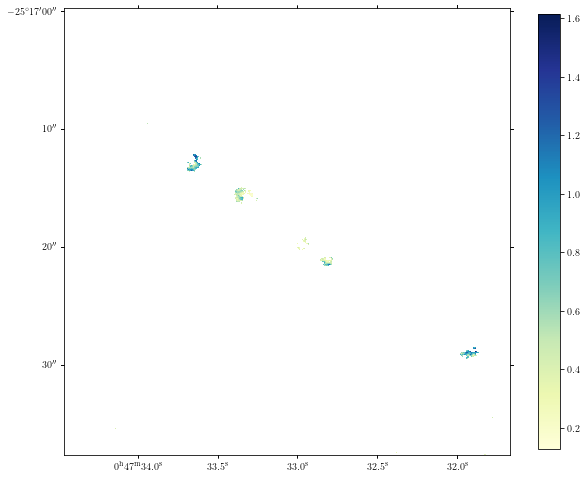

In [10]:
#Ratio of HNCO:SiO --> ask Besty why we wanted this map -->
#HNCO is very different than other molecules, its associated with shocks
#SiO is also associated with shocks, the shocks break up dust grain, causing emission from these molecules
#That tells us about their formation.
#This maps tells us if the SiO and HNCO are in the same places,
#Where we don't see them together tells us how they are destroyed.

CCH = maplist[0]
HN13C = maplist[1]
H13CN = maplist[2]
H13COp = maplist[3]
HC3N = maplist[4]
SiO = maplist[5]

#SiO bad pixels -- eyeballed, but same value as HNCO
bad_pix_SiO = np.where(SiO < 0.02)
SiO[bad_pix_SiO] = np.nan

HNCO_SiO =  HNCO/SiO
fig_HNCO_SiO = pylab.figure(1,figsize=(10,10))
ax_HNCO_SiO = pylab.subplot(projection=w)
im_HNCO_SiO = pylab.imshow(HNCO_SiO,cmap='YlGnBu')
fig_HNCO_SiO.colorbar(im_HNCO_SiO, ax=ax_HNCO_SiO, shrink=0.8)



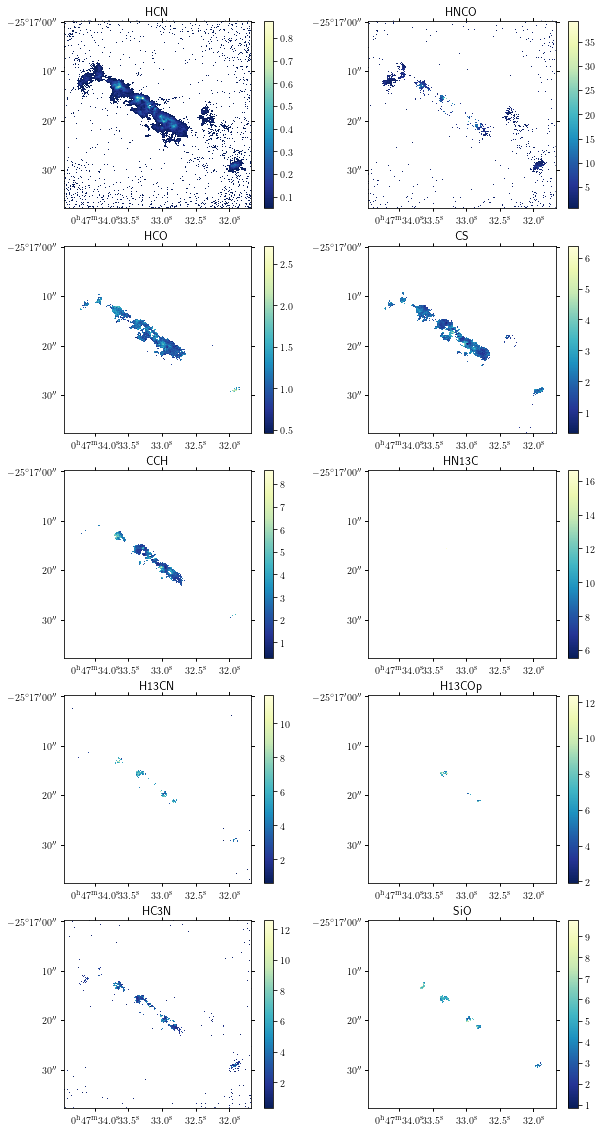

In [11]:
#HCN vs the world

names = [HCN, HNCO, HCO, CS, CCH , HN13C, H13CN, H13COp, HC3N, SiO]
string_names = ['HCN', 'HNCO', 'HCO', 'CS', 'CCH' , 'HN13C', 'H13CN', 'H13COp', 'HC3N', 'SiO']
N = len(names)
ratio = [1,2,3,4,5,6,7,8,9,10] #arbitrary
ratio[0] = HCN
fig_HCN = pylab.figure(N, figsize=(10,20))

for i in range(len(names)-1):
    ratio[i+1] = ratio[0] / names[i+1]

ax = [1,2,3,4,5,6,7,8,9,10] #arbitrary
im = [1,2,3,4,5,6,7,8,9,10] #arbitrary
for i in range(len(names)):
    j = i+1
    ax[i] = pylab.subplot(5,2,j, projection=w)
    ax[i].set_title(string_names[i])
    im[i] = pylab.imshow(ratio[i],cmap='YlGnBu_r')
    fig_HCN.colorbar(im[i], ax=ax[i])



